<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/4_DS_Bootcamp_ML_Datenbeschaffung_Datenaufbereitung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS Bootcamp Teil 2 - Machine Learning - Datenbeschaffung & Datenaufbereitung #

## DS Bootcamp Verzeichnis ##

[**Teil 1 - Data Science - Prozesse & Grundlagen**](https://github.com/sakuronohana/my_datascience/blob/master/1_DS_Bootcamp_Prozesse_%26_Grundlagen.ipynb)

[**Teil 1a - Data Science - Python Basic & Advanced**](https://github.com/sakuronohana/my_datascience/blob/master/2_DS_Bootcamp_Python_Basic_%26_Advanced.ipynb)

[**Teil 1b - Data Science - R Basic & Advanced**](https://github.com/sakuronohana/my_datascience/blob/master/3_DS_Bootcamp_R_Basic_%26_Advanced.ipynb)

[**Teil 2 - Data Science - ML - Datenbeschaffung & Datenaufbereitung**](https://github.com/sakuronohana/my_datascience/blob/master/4_DS_Bootcamp_ML_Datenbeschaffung_Datenaufbereitung.ipynb)

[**Teil 3 - Data Science - ML - Modellwahl**](https://github.com/sakuronohana/my_datascience/blob/master/5_DS_Bootcamp_ML_Modellwahl.ipynb)

[**Teil 4 - Data Science - ML - Modell Training, Testing & Optimierung**](https://github.com/sakuronohana/my_datascience/blob/master/6_DS_Bootcamp_ML_Modell_Train_Test_Optimize.ipynb)

[**Teil 5 - Data Science - ML - Modell Produktivsetzung, Überwachung & Pflege**](https://github.com/sakuronohana/my_datascience/blob/master/7_DS_Bootcamp_ML_Modell_Deploy_Monitor_Maintain.ipynb)

##Datenbeschaffung (Research/Data Gathering)##

Die Beschaffung der richtigen Daten zur Erreichung des gesetzten Zieles stellt sich oft als schwieriger heraus als gedacht. Einen Datensatz in der richtigen Qualität und Quantität zu finden ist oft eine Herausforderung. Mit viel Glück bestehen im eigenen Unternehmen grossen Datenmengen die genutzt werden können. Oft müssen diese jedoch noch zusätzlich mit externen Daten angereichert werden.

###Datensatzsuche im Internet###

Nachfolgend werden ein paar wertvolle Quellen für den Bezug von Datensätzen aufgelistet. Die meisten dieser Datenquellen sind frei zugänglich:

*  Google Dataset Search - Ist eine von Google optimierte Engine für die Suche von Datensätzen [Link](https://toolbox.google.com/datasetsearch)
*  Google Dataset Selection [Link](https://ai.google/tools/datasets/)
*  Google TensorFlow Datasets - Mit dem Module tensorflow_dataset können verschieden Datensätze für das Testen von ML Modellen angezogen werden [Link](https://www.tensorflow.org/datasets/catalog/overview) 
*  Kaggle Datasets - Die grosse DS Competition Platform Kaggle verfügt über eine Vielzahl von guten Datensätzen [Link](https://www.kaggle.com/datasets)
*  U.S. Government’s open data - Datenbank mit ein Vielzahl von Datensätzen ermittelt durch die U.S Regierung [Link](https://www.data.gov/)
*  Swiss Open Government Data - Datensätze der Schweizer Regierung [Link](https://opendata.swiss/de/)
*  European Bioinformatics Institute - Enthält eine Vielzahl von Daten aus dem Domains Biologie und Chemie [Link](https://www.ebi.ac.uk/services)
* Cool Datasets - Sammlung von Datensatzquellen [Link](https://www.cooldatasets.com/)
*  Wikipedia List of Datasets - Wikipedia Seite mit einer Vielzahl von Links zu Datensätzen [Link](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)

Neben den oben gelisteten Datensätze gibt es noch eine Menge mehr. Am besten jeweils mit folgenden Suchbegriffen in Google suchen:

    open dataset for "Thema"


###Bilder selber herstellen###

Neben den unzähligen Datensets welche sich im Internet finden lassen, gibt es auch andere Möglichkeiten Bilder für die das Trainieren eines Klassifikators zu erstellen.

***Bilder mit Fotokamera erstellen***

Diese Methode gehört wohl zur mühsamsten Art um Bilder selber herzustellen, da es für das Training eines Klassifikators tausende von Bildern braucht.

***Bilder aus Video extrahieren***

Ein guter Trick um in einer kurzen Zeit zu vielen Bildern zu gelangen ist ein Video eines Gegenstands zu drehen. Die einzelnen Bilder lassen sich dann mit dem Tool ffmpeg aus dem Video extrahieren:

   *ffmpeg -i schale.mp4 schale%03d.jpg*



###Scraping (Sammeln) von Google Images###

Google verfügt mittlerweilen über eine riesige Datenbank von Bildern, welche sich natürlich gut für das Training von Klassifikatoren (Neuronale Netzwerke)eignet.

Nachfolgend kurz eine kleines Python-Script für die Sammlung von verschiedenen Bildern

In [0]:
# importing google_images_download module
from google_images_download import google_images_download

# creating object 
response = google_images_download.googleimagesdownload()

search_queries = ['Dogs', 
                  'Cats',]
  
def downloadimages(query): 
    # keywords is the search query 
    # format is the image file format 
    # limit is the number of images to be downloaded 
    # print urs is to print the image file url 
    # size is the image size which can 
    # be specified manually ("large, medium, icon") 
    # aspect ratio denotes the height width ratio 
    # of images to download. ("tall, square, wide, panoramic") 
    arguments = {"keywords": query, 
                 "format": "jpg", 
                 "limit":4, 
                 "print_urls":True, 
                 "size": "medium"} 
    try: 
        response.download(arguments) 
      
    # Handling File NotFound Error     
    except FileNotFoundError:  
        arguments = {"keywords": query, 
                     "format": "jpg", 
                     "limit":4, 
                     "print_urls":True,  
                     "size": "medium"} 
                       
        # Providing arguments for the searched query 
        try: 
            # Downloading the photos based 
            # on the given arguments 
            response.download(arguments)  
        except: 
            pass
  
# Driver Code 
for query in search_queries: 
    downloadimages(query)  
    print()  

### Extraktion von Informationen (Daten) aus XML/HTML ###

Daten lassen sich auch direkt aus XML oder HTML Inhalten auslesen. Zu diesem Zweck gibt es eine Python Bibliothek namens "Beautiful Soup" [Link](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). Nachfolgend ein kleines Python Beispiel:

[Link zum Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/)

Ein ***Parser*** [ˈpɑːʁzɐ] (engl. to parse, „analysieren“, bzw. lateinisch pars, „Teil“; im Deutschen gelegentlich auch Zerteiler) ist ein Computerprogramm, das in der Informatik für die Zerlegung und Umwandlung einer Eingabe in ein für die Weiterverarbeitung geeigneteres Format zuständig ist.

In [0]:
''' Installation der Python Bibliothek. Hinweis: Auf Google Colab ist die Bibliothenk bereits installiert ''' 

!pip install beautifulsoup4

''' Installation des XML Parser'''
!pip install lxml

''' Installation dex HMLM Parser '''
!pip install html5lib

In [0]:
# Nun können wir das entsprechenden Modul laden bzw. importieren
import pandas as pd
from bs4 import BeautifulSoup

# Die request Bibliothek ermöglicht es uns mittels GET request ein HTML von einem Webserver herunterzuladen, da dies BS4 nicht kann.
import requests as rq  

In [0]:
# Nun werden wir mit Hilfe von Reqiest eine Webseite herunterladen

url = 'http://dataquestio.github.io/web-scraping-pages/simple.html'
page = rq.get(url)
page.status_code

# Ist der Status Code 200, dann hat der Download funktioniert. Fängt der 
# Code mit 4 oder 5 an, dann besteht ein Error

200

In [0]:
# Nun lassen wir uns mal den geladenen Inhalt anschauen

page.content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'

In [0]:
# Nun könnnen wir das heruntergeladene HTML Dokument parsern (analysieren)
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


In [0]:
list(soup.children)

['html', '\n', <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

In [0]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.NavigableString, bs4.element.Tag]

###Datenformate###

Daten können beispielsweise direkt aus Datenbanken (Rationale DB, Polystrukturierte DB usw.) oder mittels Dateien extrahiert werden. Während man im Unternehmen selbst oft auf Datenbanken wie das Data Warehouse (DWH oder IWH) usw. mittels SQL zugreifen und Daten daraus extrahieren kann, sind im Internet verschiedene Dateiformate im Umlauf. Welches Format am Besten ist, ist oft eine philosophische Angelegenheit. Es gibt aber teilweise Unterschiede im Bezug auf die Performance beim Import (bspw. CSVs werden viel schneller geladen als XLSX) Nachfolgend die wichtigsten bzw. beliebtesten Formate (siehe detailierte Beschreibung ([Link](https://towardsdatascience.com/guide-to-file-formats-for-machine-learning-columnar-training-inferencing-and-the-feature-store-2e0c3d18d4f9)):

* Columnar Data File Formats (Database-Files)
  * .parquet
  * .orc
  * .petastorm
* Tabular Text-based File Formats
  * .csv
  * .xlsx
* Nested File Formats
  * .tfrecords
  * .json
  * .xml
  * .avro
* Array-Based Formats
  * .npy
* Hierarchical Data Formats
 * .h5
 * .hdf5
 * .nc
* Model File Formats
 * .pb
 * .onnx
 * .pkl
 * .mlmodel
 * .zip
 * .pmml
 * .pt

 Nachfolgend die verwendeten Datenformat noch nach Einsatzzweck:
<img align="left" src="https://miro.medium.com/max/715/0*H7CB1kGuukCv2rcK.png" width="500"/>
<img align="left" src="https://miro.medium.com/max/626/0*0MZyp6CdafGNrnUr.png" width="500"/>
<img align="left" src="https://miro.medium.com/max/713/0*phrNmrrcyoX-lnIE.png" width="500"/>




##Datenaufbereitung (Data Pre-Processing)##

*Quelle: [Microsoft](https://docs.microsoft.com/de-de/azure/machine-learning/team-data-science-process/prepare-data)*

Warum müssen Daten vorverarbeitet und bereinigt werden?
Echte Daten stammen aus verschiedenen Quellen und Abläufen und können daher Unregelmäßigkeiten oder beschädigte Daten enthalten, die die Qualität des DataSets beeinträchtigen. Folgende Qualitätsprobleme treten bei Daten häufiger auf:
* **Unvollständige Informationen**: Den Daten fehlen Attribute oder Werte.
* **Überflüssige Informationen**: Die Daten enthalten fehlerhafte Datensätze oder Ausreißer.
* **Inkonsistente Informationen**: Die Daten enthalten widersprüchliche Datensätze oder Abweichungen.

Daten von hoher Qualität sind eine wichtige Voraussetzung für die Qualität von Vorhersagemodellen. Um schlechte Ergebnisse aufgrund schlechter Ausgangsdaten zu vermeiden und die Datenqualität und damit die Leistung des Modells zu verbessern, ist es unerlässlich, die Datenintegrität zu untersuchen, um Probleme mit den Daten frühzeitig zu erkennen und geeignete Schritte zur Vorverarbeitung und Bereinigung durchführen zu können.




###Datensatzanalyse & Datenvorverarbeitung### 






####Datenanalyse####
Die allgemeine Qualität der Daten kann wie folgt überprüft werden:
* Die Anzahl der **Datensätze**.
* Die Anzahl der Attribute (oder **Features**).
* Die Attribut-**Datentypen** (nummerische oder kategorische Werte).
* Die Anzahl der fehlenden **Werte**.
* **Struktur** der Daten.
Wenn die Daten in TSV- oder CSV-Dateien gespeichert sind, sollten Sie prüfen,ob die Spalten- und Zeilentrennzeichen die Spalten und Zeilen auch immer richtig trennen.
Bei Daten im HTML- oder XML-Format überprüfen Sie, ob die Daten gemäß den jeweiligen Standards gut strukturiert sind.
Es ist möglicherweise eine Analyse erforderlich, um strukturierte Informationen aus teilweise strukturierten oder unstrukturierten Daten zu extrahieren.
* **Inkonsistente** Datensätze. Überprüfen Sie den zulässigen Wertebereich. Wenn die Daten z.B. die Notendurchschnitte von Schülern enthalten, sollte der Durchschnitt im festgelegten Bereich liegen, also z.B. 0 bis 4.

Wenn Sie Probleme für die Daten ermitteln, sind Verarbeitungsschritte erforderlich. Dazu gehören häufig die Bereinigung fehlender Werte, die Datennormalisierung, die Diskretisierung, die Textverarbeitung zum Entfernen und/oder Ersetzen eingebetteter Zeichen, die Einfluss auf die Datenausrichtung haben können, das Bereinigen gemischter Datentypen in gemeinsamen Feldern u. a.

Meist visuelle Erkundung der Art und Struktur des Datensatzes und dessen Qualität. Oft wird in dieser Phase folgende Punkte ermittelt:
  * Datentyp (nummerische oder kategorische Werte)
  * Datensatzwerte (oft pro Feature):
    * Anzahl Datensätze (Count)
    * Anzahl fehlende Werte (Missing)
    * Arihmetischer Mittelwert (Mean) -> nur nummerischen Features
    * Zentralwert (Median)
    * Häufigster Wert (Modus)
    * Standardabweichung (Standard Deviation) zeigt Streuung der Werte bzw. wie
      durchschnittliche Entfernung zum Mittelwert.
    * Null-Werte (Zeros)
    * Kleinster Wert (Min)
    * Grösster Wert (Max)
    * Anzahl einmaliger Werte (Uniques)
    * Perzentil auch Quartil (1.Quartil = 25%, 2.Quartil = 50%    3.Quartil =    75%) besagt, dass ein bestimmter prozentualer Anteil der Beobachtungen unterhalb eines Wertes liegt. Beispiel 25% = 18 bedeutet, dass 25% der Werte unter 18 liegen. 2. Quartil bzw. 50% deckt sich immer mit dem arithmetischen Mittelwert.

####Datenvorverarbeitung
Die folgenden Tätigkeiten werden meist bereits während der Datenanalyse durchgeführt:
* **Datenbereinigung**: Auffüllen fehlender Werte, Erkennen und Entfernen überflüssiger Daten und Ausreißer.
* **Datentransformation**: Normalisierung der Daten, um Umfang und Störungen zu verringern.
* **Datenreduzierung**: Erstellen von Stichproben aus den Datensätzen oder Attributen zur einfacheren Datenverarbeitung.
* **Datendiskretisierung**: Konvertieren kontinuierlicher Attribute in kategorische Attribute zur einfacheren Verwendung in bestimmten Machine Learning-Methoden.
* **Textbereinigung**: Entfernen eingebetteter Zeichen, die zu einer falschen Datenausrichtung führen können, z. B. eingebetteter Tabstopps in tabstoppgetrennten Dateien oder eingebetteter Zeilenumbrüche, die Datensätze unterbrechen könnten, usw.

Bei fehlenden Werten empfiehlt es sich, zunächst den Grund für die fehlenden Werte zu ermitteln, um das Problem besser angehen zu können. Folgende Vorgehensweisen werden bei fehlenden Werten häufig angewendet:
* **Löschen**: Entfernen von Datensätze mit fehlenden Werten.
* **Ersetzen durch Platzhalterwerte**: Ersetzen fehlender Werte durch Platzhalterwerte: z.B. unbekannt bei kategorischen oder „0“ bei numerischen Werten.
Ersetzen durch Mittelwerte: Ersetzen fehlender numerischer Daten durch Mittelwerte.
* **Ersetzen durch häufige Werte**: Ersetzen fehlender kategorischer Daten durch den häufigsten Eintrag.
* **Ersetzen durch Regressionswerte**: Verwenden eines Regressionsverfahren, um fehlende Werte durch Regressionswerte zu ersetzen


####Tools####

Für die Datensatzanalyse bzw. Erkundung der Daten bestehen verschiedene Methoden und Tools. Nachfolgenden werden ein paar mögliche Toosl und Methoden vorgestellt:

#####**Python**#####

In erster Line kann eine Datensatzanalyse mittels den Boardmittel von Python gemacht werden. Nachfolgend die wichtigsten Befehlen zur Sichtung der Datenstruktur

In [0]:
import pandas as pd
import numpy as np

datloc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/new_strada2_data_2738408.csv'
datload = pd.read_csv(datloc)
datload.head()

,Unnamed: 0,Unnamed: 0.1,BFS_NR,GEBIET_NAME,THEMA_NAME,SET_NAME,SUBSET_NAME,INDIKATOR_ID,INDIKATOR_NAME,INDIKATOR_JAHR,INDIKATOR_VALUE,EINHEIT_KURZ,EINHEIT_LANG,Unnamed: 11
0,0,NaN,3251,Altstätten,Energie,Gasverbrauch,NaN,570,Gasverbrauch Total [MWh],2013,32838.0,MWh,Megawattstunden,NaN
1,1,1.0,3251,Altstätten,Energie,Gasverbrauch,NaN,570,Gasverbrauch Total [MWh],2014,26909.0,MWh,Megawattstunden,NaN
2,2,2.0,3251,Altstätten,Energie,Gasverbrauch,NaN,570,Gasverbrauch Total [MWh],2015,27777.0,MWh,Megawattstunden,NaN
3,3,3.0,3251,Altstätten,Energie,Gasverbrauch,NaN,570,Gasverbrauch Total [MWh],2016,27936.0,MWh,Megawattstunden,NaN
4,4,4.0,3251,Altstätten,Energie,Gasverbrauch,NaN,570,Gasverbrauch Total [MWh],2017,30093.0,MWh,Megawattstunden,NaN


In [0]:
datanaly = datload.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 11'], axis=1)

In [0]:
''' Mit der Methode info() lässt sich ein kurze Beschreibung pro Merkmal inkl. Anzahl Zeilen, Anzahl Wert ungleich Null, Datentyp und Speichernutzung darstellen '''

datanaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
BFS_NR             56 non-null int64
GEBIET_NAME        56 non-null object
THEMA_NAME         56 non-null object
SET_NAME           56 non-null object
SUBSET_NAME        0 non-null float64
INDIKATOR_ID       56 non-null int64
INDIKATOR_NAME     56 non-null object
INDIKATOR_JAHR     56 non-null int64
INDIKATOR_VALUE    55 non-null float64
EINHEIT_KURZ       56 non-null object
EINHEIT_LANG       56 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 4.9+ KB


**Hinweis**: In der Datensatzinformation sehen wir beispielsweise, dass das Feature SUBSET_NAME keine Wert bzw. nur die Werte NaN enthalten. Wir können somit dieses Feature ignorieren bzw. löschen.

In [0]:
datanaly = datanaly.drop('SUBSET_NAME', axis=1)

In [0]:
''' Mit describe() ermitteln wir die wichtigsten Werte pro nummerisches Merkmal (ohne objects)
siehe Erklärung oben 
'''

datanaly.describe()

,BFS_NR,INDIKATOR_ID,INDIKATOR_JAHR,INDIKATOR_VALUE
count,56.0,56.000000,56.000000,55.000000
mean,3251.0,575.250000,2015.142857,17690.158182
std,0.0,3.444363,1.367527,22151.306149
min,3251.0,570.000000,2013.000000,3.700000
25%,3251.0,572.000000,2014.000000,47.500000
50%,3251.0,575.000000,2015.000000,3716.000000
75%,3251.0,578.000000,2016.000000,30401.000000
max,3251.0,581.000000,2017.000000,77874.000000


**Hinweis**: Die Datensatzbeschreibungen sollte jeweils mit Vorsicht bedacht werden. So verbirgt sich hinter dem Wert INDIKATOR_VALUE in diesem Datensatz sowohl die Anzahl verbrachtes Gas wie auch Strom. Es lohnt gerade in diesem Fall zusätzlich noch eine Gruppierung vorzunehmen damit die Beschreibung noch etwas klarer wird.
Weiter können wir in der Beschreibung sehen, dass das Feature BFS_NR überall den gleichen Wert anzeigt, was daraufhin deutet, dass es nur diesen einen Wert gibt. Wir können somit dieses Feature auch ausschliessen.

In [0]:
datanaly = datanaly.drop('BFS_NR', axis=1)

datanaly.groupby('INDIKATOR_NAME').describe()

INDIKATOR_ID  ... INDIKATOR_VALUE
                                                     count  ...             max
INDIKATOR_NAME                                              ...                
Gasverbrauch Gewerbe [MWh]                             5.0  ...          7238.0
Gasverbrauch Haushalte [MWh]                           5.0  ...         26235.0
Gasverbrauch Industrie [MWh]                           5.0  ...           873.0
Gasverbrauch Total [MWh]                               5.0  ...         32838.0
Stromverbrauch Grossverbraucher [%]                    4.0  ...            50.8
Stromverbrauch Grossverbraucher [MWh]                  4.0  ...         37795.0
Stromverbrauch Kleinverbraucher [%]                    5.0  ...            48.6
Stromverbrauch Kleinverbraucher [MWh]                  5.0  ...         37367.0
Stromverbrauch Total [MWh/Energienutzer]               5.0  ...             4.5
Stromverbrauch Total [MWh]                             5.0  ...         77874.0
Stromverbrauch mittelgrosse Verbraucher [%]            4.0  ...             9.3
Stromverbrauch mittelgrosse Verbraucher [MWh]          4.0  ...          6643.0

[12 rows x 24 columns]

Eine weitere gute Möglichkeit das Wertverhälnis in einem Datensatz visuell darzustellen ist das Histogramm. Das **Histogramm** zeigt die Anzahl Datenpunkte auf der vertikalen Achse (Y) die in einem bestimmen Wertebereich auf der horizontalen Achse (X) liegen.

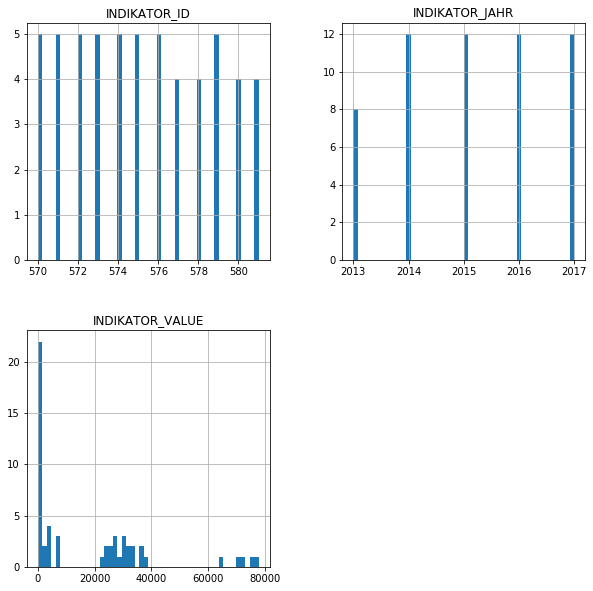

In [0]:
# Für die Darstellung des Histogramm Plots benötigen wir die Matplotlib Library.
# so lässt sich das Histogramm im Jupyter Notebook darstellen

%matplotlib inline 
import matplotlib.pyplot as plt

datanaly.hist (bins=50, figsize=(10,10))
plt.show()

**Hinweis**: Im Histogramm sehen wir beim Merkmal INDIKATOR_JAHR, dass das Jahr 2013 gegenüber den anderen Jahren wenig Datenpunkt enthält. Es könnte ein Hinweis darüber sein, dass hier einige Daten fehlen oder die Aufzeichnungen erst ab einen gewissen Monat angefangen haben. Vielleicht könnte uns eine Gruppierung nach Jahr etwas mehr Aufschluss darüber geben:

In [0]:
datanaly[datanaly['INDIKATOR_JAHR'] == 2013]

,GEBIET_NAME,THEMA_NAME,SET_NAME,INDIKATOR_ID,INDIKATOR_NAME,INDIKATOR_JAHR,INDIKATOR_VALUE,EINHEIT_KURZ,EINHEIT_LANG
0,Altstätten,Energie,Gasverbrauch,570,Gasverbrauch Total [MWh],2013,32838.0,MWh,Megawattstunden
5,Altstätten,Energie,Gasverbrauch,571,Gasverbrauch Haushalte [MWh],2013,25600.0,MWh,Megawattstunden
10,Altstätten,Energie,Gasverbrauch,572,Gasverbrauch Gewerbe [MWh],2013,7238.0,MWh,Megawattstunden
15,Altstätten,Energie,Gasverbrauch,573,Gasverbrauch Industrie [MWh],2013,NaN,MWh,Megawattstunden
20,Altstätten,Energie,Stromverbrauch,574,Stromverbrauch Total [MWh],2013,77874.0,MWh,Megawattstunden
25,Altstätten,Energie,Stromverbrauch,575,Stromverbrauch Total [MWh/Energienutzer],2013,4.5,MWh/Energienutzer,Megawattstunden pro Energienutzer
30,Altstätten,Energie,Stromverbrauch,576,Stromverbrauch Kleinverbraucher [MWh],2013,37367.0,MWh,Megawattstunden
43,Altstätten,Energie,Stromverbrauch,579,Stromverbrauch Kleinverbraucher [%],2013,48.0,%,Prozent


In [0]:
datanaly[datanaly['INDIKATOR_JAHR'] == 2014]

,GEBIET_NAME,THEMA_NAME,SET_NAME,INDIKATOR_ID,INDIKATOR_NAME,INDIKATOR_JAHR,INDIKATOR_VALUE,EINHEIT_KURZ,EINHEIT_LANG
1,Altstätten,Energie,Gasverbrauch,570,Gasverbrauch Total [MWh],2014,26909.0,MWh,Megawattstunden
6,Altstätten,Energie,Gasverbrauch,571,Gasverbrauch Haushalte [MWh],2014,22947.0,MWh,Megawattstunden
11,Altstätten,Energie,Gasverbrauch,572,Gasverbrauch Gewerbe [MWh],2014,3354.0,MWh,Megawattstunden
16,Altstätten,Energie,Gasverbrauch,573,Gasverbrauch Industrie [MWh],2014,608.0,MWh,Megawattstunden
21,Altstätten,Energie,Stromverbrauch,574,Stromverbrauch Total [MWh],2014,75142.0,MWh,Megawattstunden
26,Altstätten,Energie,Stromverbrauch,575,Stromverbrauch Total [MWh/Energienutzer],2014,4.3,MWh/Energienutzer,Megawattstunden pro Energienutzer
31,Altstätten,Energie,Stromverbrauch,576,Stromverbrauch Kleinverbraucher [MWh],2014,30709.0,MWh,Megawattstunden
35,Altstätten,Energie,Stromverbrauch,577,Stromverbrauch mittelgrosse Verbraucher [MWh],2014,6639.0,MWh,Megawattstunden
39,Altstätten,Energie,Stromverbrauch,578,Stromverbrauch Grossverbraucher [MWh],2014,37795.0,MWh,Megawattstunden
44,Altstätten,Energie,Stromverbrauch,579,Stromverbrauch Kleinverbraucher [%],2014,40.9,%,Prozent


In [0]:
# Machen wir doch mal kurz einen kleinen Vergleich:

da2013 = datanaly[datanaly['INDIKATOR_JAHR'] == 2013]
da2014 = datanaly[datanaly['INDIKATOR_JAHR'] == 2014]

def dataframe_difference(da2013, da2014, which=None):
    """Find rows which are different between two DataFrames."""
    comparison_df = da2013.merge(da2014,
                              indicator=True,
                              how='outer')
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
    #diff_df.to_csv('data/diff.csv')
    return diff_df

dfcomp = dataframe_difference(da2013, da2014)
dfcomp.groupby(['INDIKATOR_NAME','INDIKATOR_JAHR']).count()

GEBIET_NAME  ...  _merge
INDIKATOR_NAME                                INDIKATOR_JAHR               ...        
Gasverbrauch Gewerbe [MWh]                    2013                      1  ...       1
                                              2014                      1  ...       1
Gasverbrauch Haushalte [MWh]                  2013                      1  ...       1
                                              2014                      1  ...       1
Gasverbrauch Industrie [MWh]                  2013                      1  ...       1
                                              2014                      1  ...       1
Gasverbrauch Total [MWh]                      2013                      1  ...       1
                                              2014                      1  ...       1
Stromverbrauch Grossverbraucher [%]           2014                      1  ...       1
Stromverbrauch Grossverbraucher [MWh]         2014                      1  ...       1
Stromverbrauch Kleinverbraucher [%]           2013                      1  ...       1
                                              2014                      1  ...       1
Stromverbrauch Kleinverbraucher [MWh]         2013                      1  ...       1
                                              2014                      1  ...       1
Stromverbrauch Total [MWh/Energienutzer]      2013                      1  ...       1
                                              2014                      1  ...       1
Stromverbrauch Total [MWh]                    2013                      1  ...       1
                                              2014                      1  ...       1
Stromverbrauch mittelgrosse Verbraucher [%]   2014                      1  ...       1
Stromverbrauch mittelgrosse Verbraucher [MWh] 2014                      1  ...       1

[20 rows x 8 columns]

**Hinweis**: Wie wir oben erkennen können, fehlen im 2013 die folgenden Verbrauchskategorien:
* Stromverbrauch Grossverbraucher [%]
* Stromverbrauch Grossverbraucher [MWh]
* Stromverbrauch mittelgrosse Verbraucher [%]
* Stromverbrauch mittelgrosse Verbraucher [MWh]

**Erkenntnis:** Für das Training/Testing unseres ML-Algorithmus macht diese jedoch keinen Unterschied, denn im Zusammenhang mit den anderen bestehenden Verbrauchkategorien im 2013 haben wir somit mehr Daten zur Verfügung. Je mehr Daten um so besser. 

#####**Facets**#####

Eines meiner absoluten Lieblingstools ist das von Google zur Verfügung gestellte Tool **Facets** ([Link](https://pair-code.github.io/facets/)) an. Mittels Facets lassen sich die Daten aus mehreren Sichten betrachte.

OVERVIEW

Mit der Übersicht (engl. Overview) werden Feature-Daten aus einer beliebigen Anzahl von Datensätzen abgerufen, Feature für Feature analysiert und die Analyse visualisiert.
Die Übersicht bietet Benutzern ein schnelles Verständnis der Werteverteilung über die Features ihrer Datenmenge. Es lassen sich damit ungewöhnliche und häufige Probleme wie unerwartete Merkmalswerte, fehlende Merkmalswerte für eine große Anzahl von Beobachtungen, mögliche Verzerrungen beim Trainieren / Testen / Validieren etc. endecken.

<img src="https://3.bp.blogspot.com/-lkb4w1DrJ-A/WWzzyPC428I/AAAAAAAAB48/TrSFgqxaYPY-jMv0cmXJaskUz9ImyXxLwCLcBGAs/s1600/image3.png" width ="800"/>
 
DIVE

Dive bietet eine interaktive Oberfläche zum Erkunden der Beziehung zwischen Datenpunkten für alle verschiedenen Funktionen eines Datensatzes. Jedes einzelne Element in der Visualisierung repräsentiert einen Datenpunkt. Positionieren Sie Elemente, indem Sie sie anhand ihrer Feature-Werte "facettieren" oder in mehrere Dimensionen unterteilen. Zu den Erfolgsgeschichten von Dive gehören das Erkennen von Klassifikatorfehlern, das Erkennen systematischer Fehler, das Bewerten der Grundwahrheit und potenzielle neue Signale für die Rangfolge.

 <img src="https://raw.githubusercontent.com/PAIR-code/facets/master/img/dive-census.png" width = "800"/>

 Es gibt grundsätzlich zwei Arten um Facets zu nutzen. Einerseits können Daten direkt auf das Facets [Portal](https://pair-code.github.io/facets/)) geladen werden. Hier gilt natürlich zu beachten, dass es wohl nicht wirklich sinnvoll ist beispielsweise vertrauliche Unternehmensdaten auf das Portal zu laden. Die zweite Möglichkeit ist es Facets in einem Jupyter Notebook einzubinden. Nachfolgenden möchte ich diese Möglichkeit genauer aufzeigen.


***Anwendung Facets in Jupyter Notebook***

Auf dem folgenden Link ist eine detailierte Installationsanleitung zu finden [Link](https://github.com/PAIR-code/facets)

In [0]:
# Facets Komponenten installieren

!pip install facets-overview

In [0]:
import pandas as pd

datloc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/new_strada2_data_2738408.csv'

datimp = pd.read_csv(datloc)


In [0]:
# Create the feature stats for the datasets and stringify it.
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train', 'table': datimp}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [0]:
# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [0]:
# Die Daten können nun in Dive wie folgt visualisiert werden.
from IPython.core.display import display, HTML

jsonstr = datimp.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

###Datenaggregation & Datenanreicherung###

Je nach Ziel, welches wir mit unserem ML-Modell erreichen wollen, müssen wir Daten aus verschiedenen Quellen zusammenführen (aggregieren) oder die Daten aufwerten(angereichert). 

https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825


### Datenaufbereitung ML-Modell ###

Nachdem wir uns nun einen Überblick über den Datensatz verschafft haben und bereits schon die irrelevanten Daten gelöscht oder den Datensatz mit weiteren Daten angereichert haben, müssen wir nun die Daten ins richtige Format bringen.

####Feature Encoding

Die Disziplinen im Machine Learning basieren auf mathematischen Funktionen. Womit sich die Form der im ML verwendete Daten auf nummerische Zeichen beschränken. Datensätze beinhalten in ihrer urspünglichen Form jedoch sehr wohl auch textuale und kategorische Werte, welche jedoch in dieser Form nicht in einem ML verwendet werden können. Demzufolge müssen kategorische Werte in nummerische Wert umgewandelt werden. 

Im Machine Learning wurden zu diesem Zweck verschiedene Verfahren entwickelt welche dem ML Engineer bei diesem Problem helfen sollen.
Das als allgemeinhin bekannte Encoding gehört dabei zu den am meisten eingesetzten Verfahren zur Transformation von kategorische in nummerische Werte. Zu den beliebtensten Techniken gehören **Label Encoding** und **One-Hot Encoding**. Nachfolgend kurz eine Erklärung zu den einzelnen Techniken:

**Label Encoding**
Hierbei werden die kategorischen Werte in einem Datensatz Spalte für Spalte in nummerische Werte umgewandelt. Beispielsweise würde der folgenden Datensatz:

Jahr | Marke | Verkaufszahlen (Mio.)
--- | --- | ---
1980 | Adidas | 50.5
1980 | Puma | 30.2
1980| Asics | 20.5
1980| Nike | 45.2
1990 | Adidas | 60.5
1990 | Puma | 40.2
1990| Asics | 50.5
1990| Nike | 65.2

so aussehen:

Jahr | Marke | Verkaufszahlen (Mio.)
--- | --- | ---
1980 | **0** | 50.5
1980 | **1** | 30.2
1980| **2** | 20.5
1980| **3** | 45.2
1990 | **0** | 60.5
1990 | **1** | 40.2
1990| **2** | 50.5
1990| **3** | 65.2

Der Nachteil von Label Encoding ist die auferlegte Ordinalität mit welcher nicht alle ML-Algorithmen umgehen können. Ein wesentlicher Vorteil dieses Verfahrens ist der geringe Speicherplatzbedarf.

**One-Hot Encoding**
Beim One-Hot Encoding Verfahren wird eine Spalte mit kategorischen Daten in mehrere Spalten aufgeteilt. Dabei erhält jede Spalte einen Namen der auf dem ursprünglichen Spaltennamen basiert. Die Werte in den Spalten werden durch 1 und 0 ersetzt, je nachdem welche Spalte welchen Wert hat. Wenn wir nochmal unser Beispiel von oben nehmen, dann würde dies wie folgt aussehen:

Jahr | Marke_Adidas | Marke_Puma | Marke_Asics  | Marke_Nike | Verkaufszahlen (Mio.)
--- | --- | --- | --- | ---  | ---
1980 | **1** | 0 | 0 | 0 | 50.5
1980 | 0 | **1** | 0 | 0 |30.2
1980| 0 | 0 | **1** | 0 |20.5
1980| 0 | 0 | 0 | **1** |45.2
1990 | **1** | 0 | 0 | 0 |60.5
1990 | 0 | **1** | 0 | 0 |40.2
1990| 0 | 0 | **1** | 0 |50.5
1990| 0 | 0 | 0 | **1** |65.2 

Für Zeilen mit dem ersten Spaltenwert "Adidas" hat die Spalte "Marke_Adidas" eine "1" und die anderen drei Spalten eine "0". In ähnlicher Weise haben für Zeilen mit dem ersten Spaltenwert als Puma die Spalte "Marke_Puma" eine "1" und die anderen drei Spalten "0" und so weiter.

Der Vorteil dieses Verfahrens ist, dass wir hier anstelle kardinaler Zahlen nur binäre Werte verwenden womit keine ordinales Muster entsteht. Der Nachteil ist der durch die hohe Anzahl Spalten entstehende Speicherverbrauch und zunehmende Dimensionalität. Letzteres muss mittels Hauptkomponentenzerlegung (PCA) reduziert werden um nicht dem Fluch der Dimentsionalität zu verfallen

In [0]:
# LabelEndoder aus Scikit-learn importieren.

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

datimploc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/google_stock_data.csv'
datload = pd.read_csv(datimploc)

# Instanzierung des LabelEncoder Objects
le = LabelEncoder()

# apply le on categorical feature columns
datlabenc = datload[''].apply(lambda col: le.fit_transform(col))



####Skalierung und Normalisierung von Merkmalen####

Normalisierung ist der Prozess der Skalierung einzelner Stichproben auf Einheitsnorm. Die Skalierung ändert nur den Bereich Ihrer Daten. Normalisierung ist eine radikalere Transformation. Der Normalisierungspunkt besteht darin, Ihre Beobachtungen so zu ändern, dass sie als Normalverteilung beschrieben werden können

Die Skalierung von Daten ist im ML sehr wichtig, da die ML-Algorithmen davon ausgehen, dass die Daten auf der gleichen Skala (i.d.R. 0 und 1 oder -1 und 1) liegen. Daten lassen sich auf verschiedene Arten skalieren. 

Nachfolgend stelle ich die eine oder andere Technik vor:

##### Min-Max-Skalierung #####
Diese Methode gehört zu den einfachsten Skalierungstechniken. Sie verwendet die Kleinst- und Grösstwerte eines Merkmales um Werte in einem bestimmten Bereich zu skalieren. Hierzu wird folgende Berechnung angestellt:

$x^´_i = \frac{x_i-min(X)}{max(X) - min(X)} $

<img src="https://github.com/sakuronohana/my_datascience/blob/master/doc_images/Min_Max_Skalierung.png?raw=1" alt="Drawing" width = "600"/>
 
 *Quelle: Min-Max Scaling image created by [Chris Albon](https://chrisalbon.com/machine_learning/preprocessing_structured_data/rescale_a_feature/)*



Nachfolgend werden wir die Skalierung mittels Scikit-Learn durchführen:





In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

datimploc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/google_stock_data.csv'
datload = pd.read_csv(datimploc)
x = datload[(['Open','High','Low','Close','Volume','Adj Close'])]

# Skalierer erzeugen
scaler = MinMaxScaler()

# Merkmal transformieren
datscaled = scaler.fit_transform(x)
datscaled

array([[4.30832998e-01, 4.30826400e-01, 4.34726741e-01, 4.34626895e-01,
        1.17612706e-02, 9.59583498e-01],
       [4.22949043e-01, 4.28315601e-01, 4.27600667e-01, 4.30431051e-01,
        1.54627933e-02, 9.51183420e-01],
       [4.24501030e-01, 4.23764234e-01, 4.22719329e-01, 4.22682177e-01,
        1.83101185e-02, 9.35670174e-01],
       ...,
       [1.02517694e-02, 1.04157419e-02, 1.16600118e-02, 8.38273135e-03,
        2.22150736e-01, 8.38273015e-03],
       [1.61403216e-03, 6.51205767e-03, 4.04404016e-03, 7.40965591e-03,
        2.77885613e-01, 7.40965389e-03],
       [7.18327772e-04, 2.05831051e-03, 0.00000000e+00, 2.94606529e-04,
        5.43577404e-01, 2.94605348e-04]])

####Normalizierung von Beobachtungen

Die Normalisierung der Daten ist ein weiterer Aspekt, den man betrachten sollte. Bei Bildern kann dies z.B. die Skalierung auf eine fixe Auflösung sowie die Anpassung der durchschnittlichen Helligkeit sein

<img src="https://chrisalbon.com/images/machine_learning_flashcards/Normalizing_Observations_print.png" width="500"/>

*Quelle: Normalizing Observation image created by [Chris Albon](https://chrisalbon.com/machine_learning/preprocessing_structured_data/normalizing_observations/)*

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer

datimploc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/google_stock_data.csv'
datload = pd.read_csv(datimploc)
x = datload[(['Open','High','Low','Close','Volume','Adj Close'])]

# Normalizer erzeugen
normalizer = Normalizer(norm='l2')

# Feature matrix transformieren
datnorm = normalizer.transform(x)
datnorm


array([[5.97794909e-04, 6.00186114e-04, 5.96773047e-04, 5.99695603e-04,
        9.99999104e-01, 5.99695603e-04],
       [4.48650639e-04, 4.55192222e-04, 4.48564990e-04, 4.53362138e-04,
        9.99999490e-01, 4.53362138e-04],
       [3.80397875e-04, 3.81398451e-04, 3.75566058e-04, 3.77514595e-04,
        9.99999642e-01, 3.77514595e-04],
       ...,
       [6.03780181e-06, 6.18663416e-06, 5.94512195e-06, 5.96420312e-06,
        1.00000000e+00, 2.97912243e-06],
       [4.40269605e-06, 4.75444091e-06, 4.38046681e-06, 4.72087901e-06,
        1.00000000e+00, 2.35808140e-06],
       [2.22859975e-06, 2.31908106e-06, 2.13856441e-06, 2.23617716e-06,
        1.00000000e+00, 1.11697161e-06]])